<img src="images/keepcoding.png" width=200 align="left">

# Módulo de Matemáticas 101: reto del fin de semana

El reto de esta semana es implementar el algoritmo de Singular Value Decomposition para comprimir una imagen. Podéis guiaros por lo visto en las clases y os recomiendo también esta web:

https://timbaumann.info/svd-image-compression-demo/

## SVD para comprimir una imagen

El algoritmo de Singular Value Decomposition, del que ya hemos hablado en el módulo, nos puede servir para comprimir una imagen. Vamos a implementar varias funciones para esto. Como repaso, el algoritmo nos devuelve la descomposición de una matriz en tres matrices, una de ellas con los elementos principales y las otras dos con los vectores principales.

Usaremos:

- Una imagen de `scipy.datasets`
- La implementación del algoritmo en `scipy.linalg`: https://docs.scipy.org/doc/scipy-1.14.0/reference/generated/scipy.linalg.svd.html
- La librería `matplotlib`para las gráficas
- El error SSE (sum of squared estimate of errors)


Definición:

$$SSE =  \sum_{i=1}^{n}  (x_{i} -  \widehat{x}_i ) ^2 $$

Donde:

- $x_i$ son los valores de la matriz original X
- $\widehat{x}_i$ son los valores de la matriz reconstruida $\widehat{X}$

Lo primero, vemos la imagen que vamos a comprimir:

In [44]:
!pip install pooch

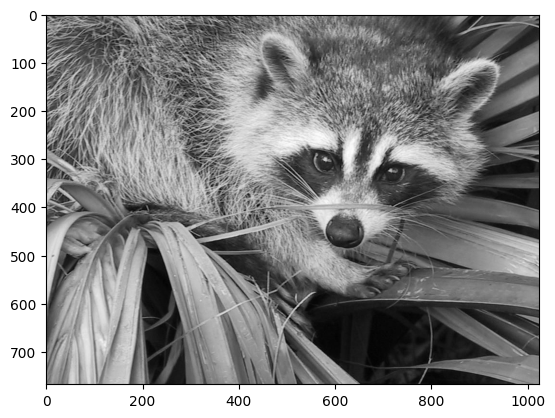

In [45]:
import matplotlib.pyplot as plt
from scipy import datasets
from scipy.datasets import face
%matplotlib inline

# Load image
A = datasets.face(gray=True)

plt.imshow(A, cmap=plt.cm.gray)
plt.show()

In [46]:
A

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ...,
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

In [47]:
type(A)

numpy.ndarray

Las siguientes funciones te ayudarán a llegar a la solución final:

### 1. Implementa la función para el SSE
La función debe tener como entrada las dos matrices y como salida un número que será el error cometido.

In [72]:
import numpy as np
def sse_score(X: int | float, X_hat: int | float) -> int | float:
  """
  Define a function that calculates the SUM OF SQUARED ERRORS.

  Args:
  X (INT or FLOAT): The original value.
  X_hat (INT or FLOAT): The predicted value.

  Returns:
  INT or FLOAT: The sum of squared errors.
  """
  #The calculation is performed and returned
  return np.sum((X - X_hat) ** 2)

X = np.array([[1, 2], [3, 4]])
X_hat = np.array([[1.01, 1.75], [2.81, 3.99]])

#TEST
sse = sse_score(X, X_hat)
print(sse) #0.09879999999999997

0.09879999999999997


### 2. Implementa una función para ejecutar SVD
La función debe tener como entrada una matriz y como salida las tres matrices de la descomposición.

In [80]:
import numpy as np
from scipy.linalg import svd

def svd_refactorized(X: np.ndarray) -> tuple([np.ndarray, np.ndarray, np.ndarray]):
  """
  Define a function that calculated SVD of X(matrix)

  Args:
  X: Matrix (Numpy Array)

  Returns:
  U: Left sigle values (Numpy Array)
  S: Singular values as a diagonal matrix (Vector)
  Vt: Right sigle values (Numpy Array)
  """
  #Performace the calculation using SVD
  U, S, Vt = svd(X, full_matrices=False)

  #Return the results
  return U, np.diag(S), Vt

X = np.array([[1.8, 1.2], [4.4, 4.6]])

#TEST
U, S, Vt = svd_refactorized(X)
print('Left singular values matrix:', U)
print('Sigma:', S)
print('Right singular values matrix:', Vt)

Left singular values matrix: [[-0.31622777 -0.9486833 ]
 [-0.9486833   0.31622777]]
Sigma: [[6.70820393 0.        ]
 [0.         0.4472136 ]]
Right singular values matrix: [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


### 3. Implementa una función para reconstruir la imagen

Esta función deberá reconstruir la imagen a partir de un set de matrizes (U, S, Vt) dado.

In [82]:
def reconstruction(U: np.ndarray, S:np.ndarray, Vt: np.ndarray) -> np.ndarray:
  """
  Define a function that re-builds the original matrix

  Args:
  U: Left sigle values (Numpy Array)
  S: Singular values as a diagonal matrix (Vector)
  Vt: Right sigle values (Numpy Array)  X: Matrix (Numpy Array)

  Returns:
  Original Matrix
  """
  #Multiply all the matrixs
  return U @ S @ Vt

#TEST
U = np.array([[-0.40455358, -0.9145143 ],
              [-0.9145143 ,  0.40455358]])
S = np.array([[5.4649857 , 0.        ],
              [0.        , 0.36596619]])
Vt = np.array([[-0.57604844, -0.81741556],
               [ 0.81741556, -0.57604844]])
X_hat = reconstruction(U, S, Vt)
X_hat

array([[0.99999999, 1.99999998],
       [3.00000003, 4.00000001]])

En este punto, ya puedes ver cuál es el error cometido si se reconstruye la matriz inicial directamente después de aplicar SVD.

In [83]:
sse = sse_score(X, X_hat)
print(f"El error de reconstrucción es: {sse:.2f}")

El error de reconstrucción es: 3.60


### 4. Implementa la compresión

Esta es la parte más complicada. A la función le tendremos que pasar la imagen, en forma matricial, y el número de componentes que queremos usar para la compresión.

La función aplicará SVD y reconstruirá la matriz usando solo los n_comp primeros valores propios de la descomposición.

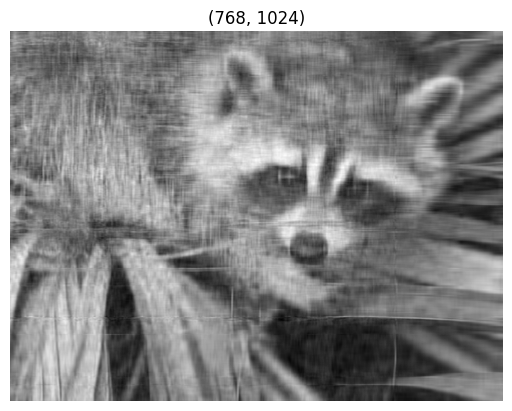

Score: 324768220.0


In [99]:

def image_compression(A: np.ndarray, n_comp: int) -> (np.ndarray, float):
    """
    Compress an image using SVD.

    Args:
    A: The  matrix to be compressed.
    n_comp: Number of components to keep.

    Returns:
    A_hat: The compressed image matrix.
    sse_result: The SSE score for the compression.
    """
    #Calculates SVD of A
    U, S, VT = svd_refactorized(A)
    #Re-build the matrix
    A_hat = reconstruction(U[:, :n_comp], S[:n_comp, :n_comp], VT[:n_comp, :])
    #Calculates the sse_score
    sse_result = sse_score(A, A_hat)

    #Return the re-builded matrix and the score
    return A_hat, sse_result

#TEST
racoon = face(gray=True)
racoon_hat, sse = image_compression(racoon, n_comp=25)
plt.imshow(racoon_hat, cmap=plt.cm.gray)
plt.axis('off')
plt.title(racoon_hat.shape)
plt.show()
print('Score:', sse)

### 5. Gráficas del resultado

Por último, se pide que pruebes para varios valores del número de componentes y grafiques la imagen original junto con varias compresiones. Puedes usar un grid 2x2 de `matplotlib`.

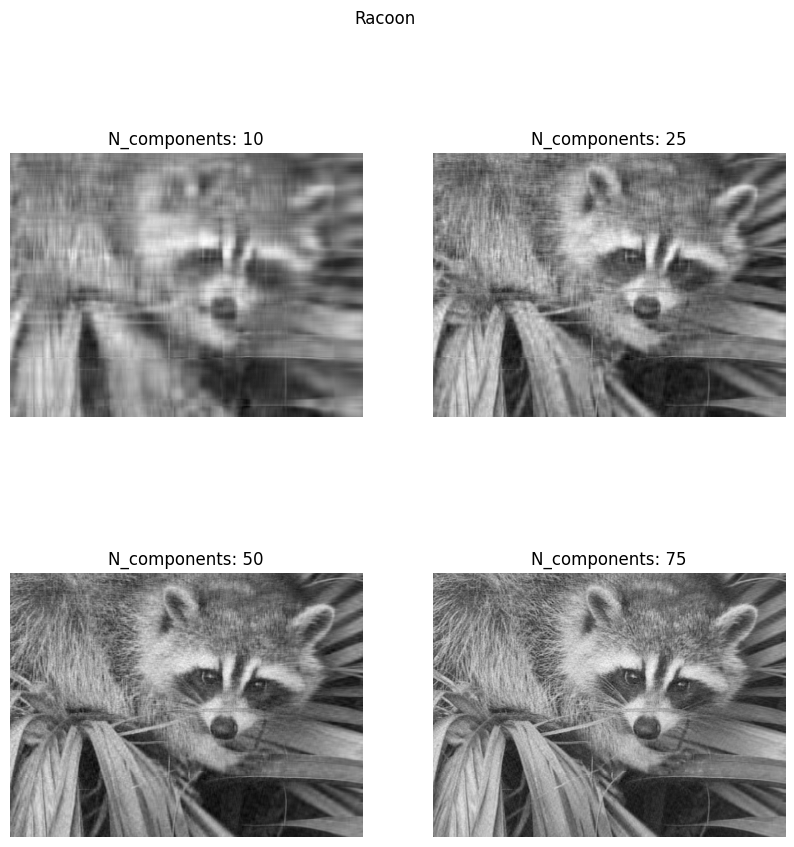

In [100]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10,10))
n_compression=[10,25,50,75]
for ax, compression in zip(axs.flatten(), n_compression):
  image_hat, _ = image_compression(A, compression)
  ax.imshow(image_hat, cmap=plt.cm.gray)
  ax.set_title(f'N_components: {compression}')
  ax.axis('off')
fig.suptitle('Racoon')
plt.show()

